In [44]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("whitegrid")

df = pd.read_csv(r"C:\Users\Jatin\Downloads\dirty_telco_data.csv")



In [45]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,ID1,male,0,yes,Yes,50.0,NO,NaN,DSL,No,...,Yes,Yes,No internet service,Yes,One year,Yes,Mailed check,82.29,4685.71,Yes
1,ID2,FEMALE,1,NO,Yes,53.0,Yes,No phone service,No,No internet service,...,No,Yes,No internet service,No internet service,Month-to-month,No,Credit card (automatic),116.80,4471.56,Unknown
2,ID3,Male,1,yes,NaN,7.0,No,No,No,Yes,...,No internet service,No,No,Yes,Month-to-month,Yes,Mailed check,109.04,8967.39,Yes
3,ID4,male,1,Yes,No,26.0,NO,Yes,DSL,Yes,...,No internet service,No internet service,No internet service,No,Two year,No,Credit card (automatic),83.24,8087.18,No
4,ID5,male,1,NO,No,26.0,No,NaN,NaN,No,...,No internet service,Yes,No internet service,No internet service,Month-to-month,Yes,Mailed check,87.91,4224.09,Unknown


In [47]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        105 non-null    object 
 1   gender            105 non-null    object 
 2   SeniorCitizen     105 non-null    int64  
 3   Partner           105 non-null    object 
 4   Dependents        68 non-null     object 
 5   tenure            100 non-null    float64
 6   PhoneService      105 non-null    object 
 7   MultipleLines     75 non-null     object 
 8   InternetService   82 non-null     object 
 9   OnlineSecurity    105 non-null    object 
 10  OnlineBackup      105 non-null    object 
 11  DeviceProtection  105 non-null    object 
 12  TechSupport       105 non-null    object 
 13  StreamingTV       105 non-null    object 
 14  StreamingMovies   105 non-null    object 
 15  Contract          105 non-null    object 
 16  PaperlessBilling  105 non-null    object 
 1

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents          37
tenure               5
PhoneService         0
MultipleLines       30
InternetService     23
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         2
Churn               27
dtype: int64

In [50]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [54]:
for col in df.select_dtypes(include="object").columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in customerID:
['ID1' 'ID2' 'ID3' 'ID4' 'ID5' 'ID6' 'ID7' 'ID8' 'ID9' 'ID10' 'ID11'
 'ID12' 'ID13' 'ID14' 'ID15' 'ID16' 'ID17' 'ID18' 'ID19' 'ID20' 'ID21'
 'ID22' 'ID23' 'ID24' 'ID25' 'ID26' 'ID27' 'ID28' 'ID29' 'ID30' 'ID31'
 'ID32' 'ID33' 'ID34' 'ID35' 'ID36' 'ID37' 'ID38' 'ID39' 'ID40' 'ID41'
 'ID42' 'ID43' 'ID44' 'ID45' 'ID46' 'ID47' 'ID48' 'ID49' 'ID50' 'ID51'
 'ID52' 'ID53' 'ID54' 'ID55' 'ID56' 'ID57' 'ID58' 'ID59' 'ID60' 'ID61'
 'ID62' 'ID63' 'ID64' 'ID65' 'ID66' 'ID67' 'ID68' 'ID69' 'ID70' 'ID71'
 'ID72' 'ID73' 'ID74' 'ID75' 'ID76' 'ID77' 'ID78' 'ID79' 'ID80' 'ID81'
 'ID82' 'ID83' 'ID84' 'ID85' 'ID86' 'ID87' 'ID88' 'ID89' 'ID90' 'ID91'
 'ID92' 'ID93' 'ID94' 'ID95' 'ID96' 'ID97' 'ID98' 'ID99' 'ID100']

Unique values in gender:
['male ' ' FEMALE' 'Male' 'Female']

Unique values in Partner:
['yes' 'NO' 'Yes' 'No']

Unique values in Dependents:
['Yes' nan 'No']

Unique values in PhoneService:
['NO' 'Yes' 'No' 'yes']

Unique values in MultipleLines:
[nan 'No phone ser

In [ ]:
df["tenure"].fillna(0, inplace=True)
df.fillna("Unknown", inplace=True)

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df = df.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

In [ ]:

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [66]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        100 non-null    object 
 1   gender            100 non-null    object 
 2   SeniorCitizen     100 non-null    int64  
 3   Partner           100 non-null    object 
 4   Dependents        100 non-null    object 
 5   tenure            100 non-null    float64
 6   PhoneService      100 non-null    object 
 7   MultipleLines     100 non-null    object 
 8   InternetService   100 non-null    object 
 9   OnlineSecurity    100 non-null    object 
 10  OnlineBackup      100 non-null    object 
 11  DeviceProtection  100 non-null    object 
 12  TechSupport       100 non-null    object 
 13  StreamingTV       100 non-null    object 
 14  StreamingMovies   100 non-null    object 
 15  Contract          100 non-null    object 
 16  PaperlessBilling  100 non-null    object 
 17  Pay

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

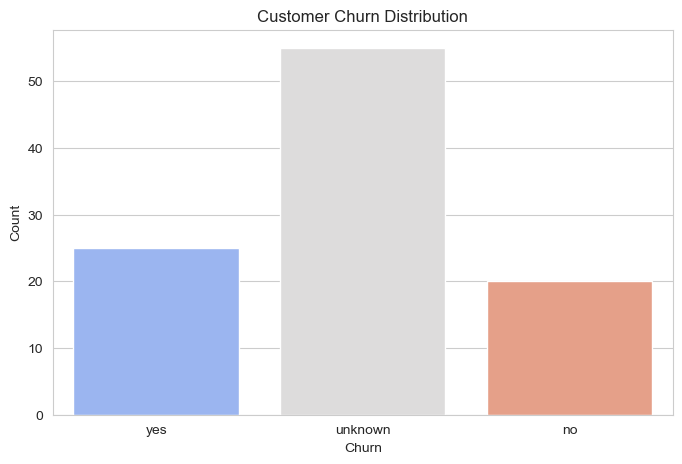

In [76]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Churn", hue="Churn", data=df, palette="coolwarm")

plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


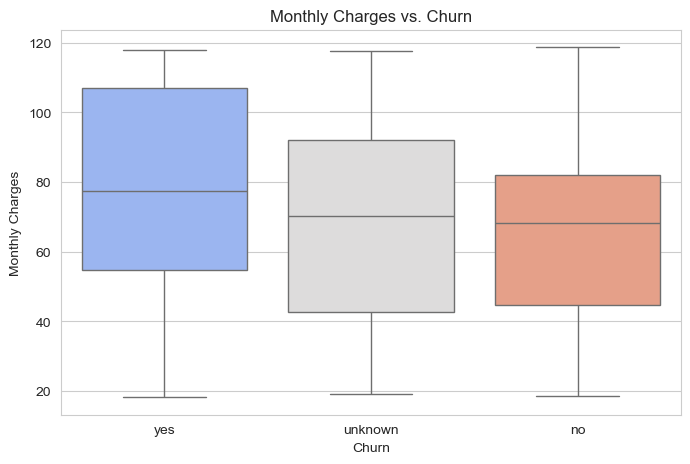

In [77]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", hue="Churn", y="MonthlyCharges", data=df, palette="coolwarm")

plt.title("Monthly Charges vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

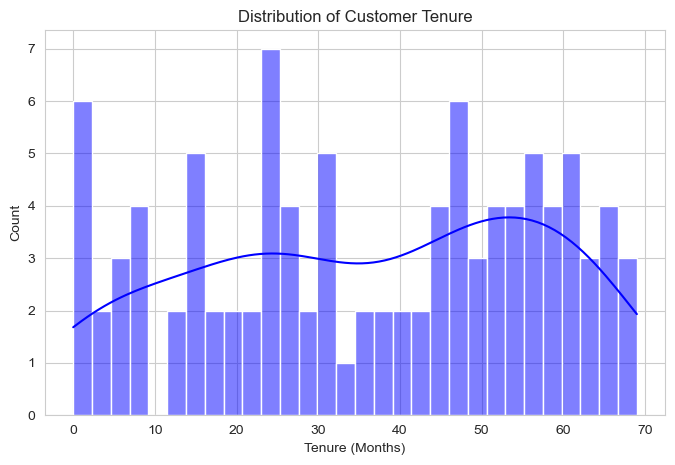

In [69]:
plt.figure(figsize=(8, 5))
sns.histplot(df["tenure"], bins=30, kde=True, color="blue")

plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

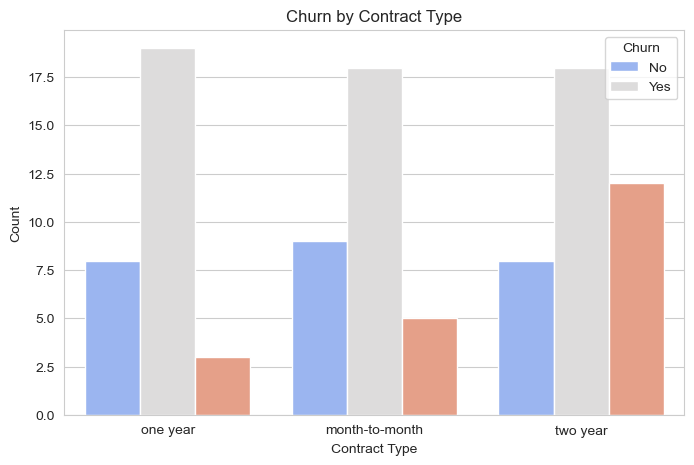

In [70]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Contract"], hue=df["Churn"], palette="coolwarm")

plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()